In [1]:
import spacy
from spacy import displacy
from tqdm import tqdm

nlp = spacy.load("en_core_web_sm")

C:\Users\Varun\ATAI\venv\Lib\site-packages\cupy\_environment.py:216: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
C:\Users\Varun\ATAI\venv\Lib\site-packages\cupy\_environment.py:216: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
C:\Users\Varun\ATAI\venv\Lib\site-packages\cupy\_environment.py:216: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
C:\Users\Varun\ATAI\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [3]:
doc = nlp("Telsa Inc is going to aquire Twitter for 45 billion dollars in 2023")

for ent in doc.ents:
    print(ent.text,"|",ent.label_)
    

Telsa Inc | ORG
Twitter | PRODUCT
45 billion dollars | MONEY
2023 | DATE


In [4]:
doc = nlp("Who is the director of Batman 1989")

for ent in doc.ents:
    print(ent.text,"|",ent.label_)
    

displacy.render(doc, style = "ent")

Batman 1989 | ORG


In [5]:
from rdflib.namespace import Namespace, RDF, RDFS, XSD
from rdflib.term import URIRef, Literal
import csv
import json
import networkx as nx
import pandas as pd
import rdflib
from collections import defaultdict, Counter
import locale

In [6]:
_ = locale.setlocale(locale.LC_ALL, '')
from _plotly_future_ import v4_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import plotly.io as pio
pio.renderers.default = 'jupyterlab+svg'

In [7]:
graph = rdflib.Graph()
graph.parse('./14_graph.nt', format='turtle')

<Graph identifier=N3f6d0c1bdc7b4bd2b801a3e739f63eab (<class 'rdflib.graph.Graph'>)>

In [8]:
# prefixes used in the graph
WD = Namespace('http://www.wikidata.org/entity/')
WDT = Namespace('http://www.wikidata.org/prop/direct/')
SCHEMA = Namespace('http://schema.org/')
DDIS = Namespace('http://ddis.ch/atai/')

In [9]:
entities = set(graph.subjects()) | {s for s in graph.objects() if isinstance(s,URIRef)}
predicates = set(graph.predicates())
literals = {s for s in graph.objects() if isinstance(s, Literal)}
with_type = set(graph.subjects(WDT['P31'], None))
with_super = set(graph.subjects(WDT['P279'], None))
types = set(graph.objects(None, WDT['P31']))
supers = set(graph.objects(None, WDT['P279']))
with_label = set(graph.subjects(RDFS.label, None))
n_ents = len(entities)
n_rels = len(predicates)
n_lits = len(literals)
t_tot = len(graph)
t_ent = len([1 for s,p,o in graph.triples((None, None, None)) if isinstance(o,URIRef)])
t_lit = t_tot - t_ent
n_notype = len(entities - with_type - with_super)
n_notype_flt = len(entities - with_type - with_super - types - supers)

In [10]:


count = 1000
for predicate in predicates:
    count-=1
    if(count==0):
        break
    print(str(predicate))
    


http://www.wikidata.org/prop/direct/P2860
http://www.wikidata.org/prop/direct/P737
http://www.wikidata.org/prop/direct/P5389
http://www.wikidata.org/prop/direct/P629
http://www.wikidata.org/prop/direct/P18
http://www.wikidata.org/prop/direct/P27
http://www.wikidata.org/prop/direct/P272
http://www.wikidata.org/prop/direct/P156
http://www.wikidata.org/prop/direct/P2637
http://www.wikidata.org/prop/direct/P1327
http://www.wikidata.org/prop/direct/P119
http://www.wikidata.org/prop/direct/P1589
http://www.wikidata.org/prop/direct/P2632
http://www.wikidata.org/prop/direct/P69
http://www.wikidata.org/prop/direct/P8874
http://www.wikidata.org/prop/direct/P1165
http://www.wikidata.org/prop/direct/P5072
http://www.wikidata.org/prop/direct/P345
http://www.wikidata.org/prop/direct/P159
http://www.wikidata.org/prop/direct/P172
http://www.wikidata.org/prop/direct/P800
http://www.wikidata.org/prop/direct/P6275
http://www.wikidata.org/prop/direct/P3818
http://www.wikidata.org/prop/direct/P802
http://w

In [11]:
genre_list = {str(s):"<"+str(uri)+">" for uri,s in graph.query('''
PREFIX ddis: <http://ddis.ch/atai/>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX schema: <http://schema.org/>
SELECT ?genre ?lbl WHERE {
?movie wdt:P31 wd:Q11424 .
?movie wdt:P136 ?genre .
?genre rdfs:label ?lbl .
}
''')}

print(genre_list)


{'LGBT-related film': '<http://www.wikidata.org/entity/Q20442589>', 'romance film': '<http://www.wikidata.org/entity/Q1054574>', 'comedy film': '<http://www.wikidata.org/entity/Q157443>', 'Western film': '<http://www.wikidata.org/entity/Q172980>', 'parody film': '<http://www.wikidata.org/entity/Q622548>', 'drama': '<http://www.wikidata.org/entity/Q130232>', 'action film': '<http://www.wikidata.org/entity/Q188473>', 'thriller film': '<http://www.wikidata.org/entity/Q2484376>', 'kung fu film': '<http://www.wikidata.org/entity/Q3072042>', 'war film': '<http://www.wikidata.org/entity/Q369747>', 'documentary film': '<http://www.wikidata.org/entity/Q93204>', 'gangster film': '<http://www.wikidata.org/entity/Q7444356>', 'historical film': '<http://www.wikidata.org/entity/Q17013749>', 'biographical film': '<http://www.wikidata.org/entity/Q645928>', 'crime thriller': '<http://www.wikidata.org/entity/Q19367312>', 'film based on books': '<http://www.wikidata.org/entity/Q52207310>', 'spy film': '<

In [12]:
genre_df = pd.DataFrame(genre_list.items(),columns=["genre","uri"])
genre_df.to_pickle("./genres.pkl")

In [13]:
people_list = {str(s):"<"+str(uri)+">" for uri,s in graph.query('''
PREFIX ddis: <http://ddis.ch/atai/>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX schema: <http://schema.org/>
SELECT ?person ?lbl WHERE {
?person wdt:P31 wd:Q5 .
?person rdfs:label ?lbl .
}
''')}

len(people_list)

98653

In [14]:
name_df = pd.DataFrame(people_list.items(),columns=["name","uri"])
name_df.to_pickle("./names.pkl")

In [218]:
movie_dict = {str(s):"<"+str(uri)+">" for uri,s in graph.query('''
PREFIX ddis: <http://ddis.ch/atai/>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX schema: <http://schema.org/>
SELECT ?movie ?lbl WHERE {
?movie wdt:P31 wd:Q11424 .
?movie rdfs:label ?lbl .
}
''')}



movie_dict["The Princess and the Frog"]="<http://www.wikidata.org/entity/Q171300>"
#movie_dict["Weathering with you"] = "<http://www.wikidata.org/entity/Q59692464>"

len(movie_dict)

23066

In [219]:
movie_df = pd.DataFrame(movie_dict.items(),columns=["movie_name","uri"])
movie_df.to_pickle("./data/movies.pkl")

In [17]:
#predicate = 'http://www.wikidata.org/prop/direct/P366'
predicate_dict = {}
prefix_string = "PREFIX ddis: <http://ddis.ch/atai/> PREFIX wd: <http://www.wikidata.org/entity/> PREFIX wdt: <http://www.wikidata.org/prop/direct/> PREFIX schema: <http://schema.org/> "
for uri in predicates:
    try:
        p = uri.split("/")[-1]
        query_string = "SELECT ?lbl WHERE { wdt:PREDICATE rdfs:label ?lbl . }".replace("PREDICATE",p)
        res = graph.query(prefix_string + query_string)
        label, = res
        predicate_dict[str(label[0])] = "<"+str(uri)+">"
    except:
        pass


predicate_dict

{'cites work': '<http://www.wikidata.org/prop/direct/P2860>',
 'influenced by': '<http://www.wikidata.org/prop/direct/P737>',
 'permanent resident of': '<http://www.wikidata.org/prop/direct/P5389>',
 'edition or translation of': '<http://www.wikidata.org/prop/direct/P629>',
 'image': '<http://www.wikidata.org/prop/direct/P18>',
 'country of citizenship': '<http://www.wikidata.org/prop/direct/P27>',
 'production company': '<http://www.wikidata.org/prop/direct/P272>',
 'followed by': '<http://www.wikidata.org/prop/direct/P156>',
 'RARS rating': '<http://www.wikidata.org/prop/direct/P2637>',
 'partner in business or sport': '<http://www.wikidata.org/prop/direct/P1327>',
 'place of burial': '<http://www.wikidata.org/prop/direct/P119>',
 'lowest point': '<http://www.wikidata.org/prop/direct/P1589>',
 'place of detention': '<http://www.wikidata.org/prop/direct/P2632>',
 'educated at': '<http://www.wikidata.org/prop/direct/P69>',
 'Hong Kong film rating': '<http://www.wikidata.org/prop/direct

In [18]:
result = graph.query('''
PREFIX ddis: <http://ddis.ch/atai/>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX schema: <http://schema.org/>
SELECT ?movie ?lbl ?rating WHERE {
?movie wdt:P31 wd:Q11424 .
?movie ddis:rating ?rating .
?movie rdfs:label ?lbl .
}
''')

In [19]:
for s in result:
    print(str(s))

(rdflib.term.URIRef('http://www.wikidata.org/entity/Q1004657'), rdflib.term.Literal('Bully', lang='en'), rdflib.term.Literal('6.9', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#decimal')))
(rdflib.term.URIRef('http://www.wikidata.org/entity/Q1018729'), rdflib.term.Literal('The Chinese Feast', lang='en'), rdflib.term.Literal('6.9', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#decimal')))
(rdflib.term.URIRef('http://www.wikidata.org/entity/Q1022401'), rdflib.term.Literal('The Super', lang='en'), rdflib.term.Literal('5.7', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#decimal')))
(rdflib.term.URIRef('http://www.wikidata.org/entity/Q1024694'), rdflib.term.Literal('Nightbreed', lang='en'), rdflib.term.Literal('6.6', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#decimal')))
(rdflib.term.URIRef('http://www.wikidata.org/entity/Q1025198'), rdflib.term.Literal('Cadillac Man', lang='en'), rdflib.term.Literal('5.7', datatype=rdflib.

(rdflib.term.URIRef('http://www.wikidata.org/entity/Q960349'), rdflib.term.Literal('The Pirate', lang='en'), rdflib.term.Literal('7.0', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#decimal')))
(rdflib.term.URIRef('http://www.wikidata.org/entity/Q960534'), rdflib.term.Literal('Snakes on a Train', lang='en'), rdflib.term.Literal('2.2', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#decimal')))
(rdflib.term.URIRef('http://www.wikidata.org/entity/Q961100'), rdflib.term.Literal('Curdled', lang='en'), rdflib.term.Literal('5.9', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#decimal')))
(rdflib.term.URIRef('http://www.wikidata.org/entity/Q962363'), rdflib.term.Literal('Cry Freedom', lang='en'), rdflib.term.Literal('7.4', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#decimal')))
(rdflib.term.URIRef('http://www.wikidata.org/entity/Q962592'), rdflib.term.Literal('Sniper', lang='en'), rdflib.term.Literal('6.1', datatype=rdflib.term.UR

In [20]:
import editdistance

In [21]:



entity = "Cars"

question = f"who is the cast mmber of {entity}?"

#roles = ["actor","director","producer"]

In [22]:
import re

# a naive way for matching entities and relations

question_pattern = "who is the (.*) of ENTITY"

print("question pattern: {}\n".format(question_pattern))

question = re.sub(entity, "ENTITY", question.rstrip("?"))  # preprocess the question

relation = re.match(question_pattern, question).group(1)  # match the relation using a pattern

print("recognized relation: {}\n".format(relation))

question pattern: who is the (.*) of ENTITY

recognized relation: cast mmber



In [23]:
from rapidfuzz import process,fuzz

def match_entity(entity,entity_dict):
    
    result = None
    substr_result = None
    for key,val in entity_dict.items():
        if(entity.lower()==key.lower() and result==None):
            result=val
            print("exact match")
        elif(entity.lower() in key.lower() and substr_result==None):
            substr_result = val
            print("substring match")
    
    if(result!=None):
        return result
    if(substr_result!=None):
        return substr_result
    
    print("fuzzy match")
            
    
    fuzz_match = process.extract(entity, entity_dict.keys(), scorer=fuzz.WRatio, limit=3)
    print(fuzz_match)
    return entity_dict[fuzz_match[0][0]]

    """
    tmp = 9999
    match_node = ""
    #print("--- entity matching for \"{}\"\n".format(entity))
    for key, value in entity_dict.items():
        #print("edit distance between {} and {}: {}".format(value, entity, editdistance.eval(value, entity)))
        if editdistance.eval(key, entity) < tmp:
            tmp = editdistance.eval(key, entity)
            match_node = value
    
            
    return match_node"""

match_node = match_entity(entity,movie_dict)
#match_pred = match_entity(relation,predicate_list)

print("\n--- the matching node of \"{}\" is {}\n".format(entity, match_node))
#print("--- the matching predicates of \"{}\" is {}\n".format(relation, match_pred))

substring match

--- the matching node of "Cars" is <http://www.wikidata.org/entity/Q1313530>



In [24]:
query_string = "SELECT ?y WHERE { <MOVIE_NAME> <PREDICATE> ?x . ?x rdfs:label ?y}".replace("PREDICATE",match_pred).replace("MOVIE_NAME",match_node)
constructed_query = prefix_string + query_string
print(constructed_query)
res = graph.query(constructed_query)

for s in res:
    print(str(s[0]))

NameError: name 'match_pred' is not defined

In [26]:
# Defining some dictionaries for mapping wrods to predicates
roles = {
    "actor":"P161",
    "cast":"P161",
    "cast member":"P161",
    "director":"P57",
    "screenwriter":"P58",
    "producer":"P162",
}

actions = {
    "acted":"P161",
    "directed":"P57",
    "screenwrote":"P58",
    "wrote":"P58",
    "written":"P58",
    "produced":"P162",
    "featured":"P161",
    "featuring":"P161",    
}

roles_dict = {k:"<http://www.wikidata.org/prop/direct/"+v+">" for k,v in roles.items()}
actions_dict = {k:"<http://www.wikidata.org/prop/direct/"+v+">" for k,v in actions.items()}


genres = {v.replace(" film",""):k for k,v in genre_list.items()}

actions_dict

{'acted': '<http://www.wikidata.org/prop/direct/P161>',
 'directed': '<http://www.wikidata.org/prop/direct/P57>',
 'screenwrote': '<http://www.wikidata.org/prop/direct/P58>',
 'wrote': '<http://www.wikidata.org/prop/direct/P58>',
 'written': '<http://www.wikidata.org/prop/direct/P58>',
 'produced': '<http://www.wikidata.org/prop/direct/P162>',
 'featured': '<http://www.wikidata.org/prop/direct/P161>',
 'featuring': '<http://www.wikidata.org/prop/direct/P161>'}

In [27]:

sentence_list_1 = [
    "Who is the <role> of <movie>?",
    "Who are the <role>s of <movie>?",
    "Who <directed/wrote> <movie>? ",
    "Who acted in <movie>?",
    "Who was the <role> of <movie>?",
    "Give me the <role> of <movie>",
    "Tell me the <role> for <movie>",
    "Who <directed/wrote> the movie <movie>?",
    "Identify the <role> of <movie>",
    "I'd like to know the <role>'s name for <movie>",
    "Who was in charge of directing <movie>?",
    "Give me the name of the <role> of <movie>",
    "What is the <role>'s name for the movie <movie>?",
    "Tell me the <role> behind <movie>",
    "Who is the <role> of the film <movie>?",
    "I'm curious about the person who <directed/wrote> <movie>"

]

query_1 = "SELECT ?y WHERE { <movie> <action/role> ?x . ?x rdfs:label ?y}"


sentence_list_2 = [
    "List movies directed by <name>",
    "List movies written by <name>",
    "Give me a list of movies featuring <name>",
    "Give me a list of movies directed by <name>",
    "Give me a list of <genre> movies directed by <name>",
    "Give me a list of <genre> movies featuring <name>",
    "Give me a list of <genre> movies written by <name>",
    "Give me a list of movies written by <name>",
    "Which movies has <name> directed?",
    "Which movies has <name> <acted/wrote>"
]

query_2 = "SELECT ?y WHERE { ?x <action/role> <name> . ?x rdfs:label ?y . ?x wdt:P136 <genre> . }"


sentence_list_3 = [
    "When was <movie> released?",
    "When did <movie> come out?",
    "Tell me the release date of <movie>",
    "What is the release year of <movie>?",
    "When did <movie> come out?",
    "Give me the release date for <movie>",
    "What's the release year of the movie <movie>?",
    "I'd like to know the release date of the movie <movie>.",
    "When was the movie <movie> released?",
    "Please provide the release year for <movie>",
    "What's the date of release for <movie>?",
    "When did <movie> hit the theaters?"
]

query_3 = "SELECT ?x WHERE { <movie> wdt:P577 ?x}"


sentence_list_4 = [
    "Which genre does the movie <movie> belong to?",
    "Which genre does <movie> belong to?",
    "Tell me the genre of <movie>",
    "What genre is associated with <movie>?",
    "Identify the movie genre for <movie>",
    "I'd like to know the genre of <movie>",
    "What category does <movie> fall into?",
    "Give me the genre for the movie <movie>",
    "What is the movie genre for <movie>?",
    "Tell me the type of film that is <movie>",
    "Which category does <movie> fit into?",
    "I'm curious about the genre of <movie>"
]

query_4 = "SELECT ?y WHERE { <movie> wdt:P136 ?x . ?x rdfs:label ?y}"

sentence_list_5 = [
    "Tell me the movie with the <highest/lowest> user rating",
    "What movie has the <highest/lowest> user rating?",
    "Identify the film with the <highest/lowest> user rating",
    "I'd like to know the movie with the <highest/lowest> user rating",
    "Which film received the <highest/lowest> user rating?",
    "Give me the movie that has the <highest/lowest> user rating",
    "What is the movie with the <highest/lowest> user rating?",
    "Tell me the film that received the <highest/lowest> user rating",
    "Which movie is rated the <highest/lowest> by users?",
    "I'm curious about the movie with the <highest/lowest> user rating",

    "Show me the <highest/lowest>-rated films.",
    "List the movies with the <best/worst> ratings.",
    "I want to see the <top/bottom>-rated movies.",
    "Display the movies with the <highest/lowest> ratings.",
    "What are the most highly-rated films?",
    "Provide a list of the <top/bottom>-rated movies.",
    "Give me the <highest/lowest>-rated films.",
    "Show the movies with the <best/worst> ratings",
    "Retrieve the movies with the <highest/lowest> ratings",]

query_5 = "SELECT ?lbl WHERE { SELECT ?movie ?lbl ?rating WHERE { ?movie wdt:P31 wd:Q11424 . ?movie ddis:rating ?rating . ?movie rdfs:label ?lbl . } ORDER BY <order>(?rating) LIMIT <number>}"

sentence_list_6 = [
    "Show me the <highest/lowest>-rated <genre> films",
    "List the <genre> movies with the <best/worst> ratings",
    "I want to see the <top/bottom>-rated <genre> movies",
    "Display the <genre> movies with the <highest/lowest> ratings",
    "What are the most highly-rated <genre> films?",
    "Provide a list of the <top/bottom>-rated <genre> movies",
    "Give me the <highest/lowest>-rated <genre> films",
    "Show the movies with the <best/worst> <genre> ratings",
    "Retrieve the movies with the <highest/lowest> <genre> ratings",
]

query_6 = "SELECT ?lbl WHERE { SELECT ?movie ?lbl ?rating WHERE { ?movie wdt:P31 wd:Q11424 . ?movie ddis:rating ?rating . ?movie wdt:P136 <genre> . ?movie rdfs:label ?lbl . } ORDER BY <order>(?rating) LIMIT <number>}"

sentence_list_7 = [
    "Show me the <highest/lowest>-rated <genre> films <action> <name>",
    "List the <genre> movies with the <best/worst> ratings <action> <name>",
    "I want to see the <top/bottom>-rated <genre> movies <action> <name>",
    "Display the <genre> movies with the <highest/lowest> ratings <action> <name>",
    "What are the most highly-rated <genre> films <action> <name>?",
    "Provide a list of the <top/bottom>-rated <genre> movies <action> <name>",
    "Give me the <highest/lowest>-rated <genre> films <action> <name>",
    "Show the movies with the <best/worst> <genre> ratings <action> <name>",
    "Retrieve the movies with the <highest/lowest> <genre> ratings <action> <name>",

    "List the <genre> movies <action> <name> with the <best/worst> ratings",
    "Display the <genre> movies <action> <name> with the <highest/lowest> ratings",
    "Provide a list of the <top/bottom>-rated <genre> movies",
    "Show the movies <action> <name> with the <best/worst> <genre> ratings",
    "Retrieve the movies <action> <name> with the <highest/lowest> <genre> ratings",
]

query_7 = "SELECT ?lbl WHERE { SELECT ?movie ?lbl ?rating WHERE { ?movie wdt:P31 wd:Q11424 . ?movie ddis:rating ?rating . ?movie <action> <name> . ?movie wdt:P136 <genre> . ?movie rdfs:label ?lbl . } ORDER BY <order>(?rating) LIMIT <number>}"

sentence_list_8 = [ # year-related
    "List the movies released in <year>",
    "Which movies were directed by <name> in <year>?",
    "What movies were released in <year>?",
    "What movies did <name> appear in in <year>?",
    "List the films featuring <name> in <year>",
    "Provide the filmography of <name> in <year>",
    "Which movies starred <name> in <year>?",
    "Which roles were played by <name> in <year>?"
]

query_8 = 'SELECT ?lbl  WHERE { <movie> wdt:P31 wd:Q11424 . ?movie wdt:P577 ?release_date ?movie rdfs:label ?lbl .FILTER regex(str(?release_date), "<year>") .}'


sentence_list_9 = [ #Top/lowest N (based on release date)
    "What are the <best/worst> <number> movies <name> directed?",
    "List the <best/worst> <number> movies directed by <name>",
    "What are the <best/worst> <number> movies <name> directed?",
    "What are the <best/worst> <number> <genre> movies <name> directed?",
    "Which are the <best/worst> movies where <name> appeared?",
    "Can you name the <best/worst> <number> <genre> movies directed by <name>?",
    "Can you list the <best/worst> <number> films with <name> in the cast?",
    "What are the <best/worst> <number> movies starring <name>"
]

query_9 = "SELECT ?lbl WHERE { SELECT ?movie ?lbl ?rating WHERE { ?movie wdt:P31 wd:Q11424 . ?movie ddis:rating ?rating . ?movie <action> <name> . ?movie wdt:P136 <genre> . ?movie rdfs:label ?lbl . } ORDER BY <order>(?rating) LIMIT <number>}"

sentence_list_10 = [ #Yes/No
    "Is <name> in the cast of <movie>?",
    "Did <name> direct <movie>?",
    "Was the <movie> released in <year>?",
    "Is <name> part of the cast of <movie>?",
    "Was <movie> released before <year>?",
    "Is <movie> classified as <genre>?",
    "Did <name> appear in <movie>?",
]

query_10 = 'ASK {<name> <action> <movie> . <movie> wdt:P577 ?release_date .<movie> wdt:P136 <genre> FILTER regex(str(?release_date), "<year>") . }'

sentence_list_11 = [
        
    # genre
    "Recommend me movies with the genres <genre>, <genre>, and <genre>",
    "Are there any <genre> and <genre> movies?",
    "I am looking for <genre> and <genre> movies, anything you would recommend?",
    "Are there any movies that blend the genres of <genre> and <genre>?",
    "I am looking for movies that fall under both <genre> and <genre>. Anything you would recommend?",
    "Can you suggest films that seamlessly combine elements of <genre> and <genre>?",
    "Which movies successfully incorporate both <genre> and <genre> in their storytelling?",
    "Do you have recommendations for movies that showcase a mix of <genre> and <genre>?",
    "I'm interested in exploring the intersection of <genre> and <genre>. Any standout films in that category?",
    "Can you provide a list of movies that are known for their unique blend of <genre> and <genre>?",
    "Are there any critically acclaimed movies that successfully navigate the genres of both <genre> and <genre>?",
    "I enjoy movies that combine the elements of <genre> and <genre>. What are your top picks in this category?",
    "Can you recommend movies that span a wide range of genres, including <genre>, <genre>, and <genre>?",
    "I'm in the mood for a movie night with diverse genres. Any suggestions for films that include <genre> and <genre>?",
    "Do you have recommendations for movies that masterfully balance the genres of both <genre> and <genre>?"
    
]

sentence_list_12 = [
    # Movie recommendation
    # Three movies
    "Given that I like <movie>, <movie>, and <movie>, can you recommend some movies?",
    "Recommend movies like <movie>, <movie>, and <movie>",
    "Since I enjoy <movie>, <movie>, and <movie>, do you have any movie recommendations for me?",
    "I'm a fan of <movie>, <movie>, and <movie>. Any suggestions for similar movies?",
    "Considering my liking for <movie>, <movie>, and <movie>, could you suggest some other films I might enjoy?",
    "Given my interest in <movie>, <movie>, and <movie>, can you recommend additional movies for me to watch?",
    "If I enjoy <movie>, <movie>, and <movie>, what other movies would you suggest?",
    "Being a fan of <movie>, <movie>, and <movie>, are there similar movies you'd recommend?",
    "Since I like <movie>, <movie>, and <movie>, what other movies do you think I might like?",
    "I've enjoyed <movie>, <movie>, and <movie>. Any recommendations for movies in a similar vein?",
    "Given my preference for <movie>, <movie>, and <movie>, what other films should I check out?",
    "If <movie>, <movie>, and <movie> are my preferences, do you have any movie recommendations for me?",
    "Suggest films similar to <movie>, <movie>, and <movie>",
    "Can you recommend movies akin to <movie>, <movie>, and <movie>?",
    "Looking for movies in the same vein as <movie>, <movie>, and <movie>. Any recommendations?",
    "Seeking recommendations for movies like <movie>, <movie>, and <movie>",
    "Do you know any movie similar to <movie>, <movie>, and <movie>",
    "I'm on the lookout for captivating films that share a vibe with <movie>, <movie>, and <movie>. Any suggestions that align with these favorites of mine?",
    "In the mood for something reminiscent of <movie>, <movie>, and <movie>. Any movie recommendations that capture a similar essence?",
    "If my taste for movies like <movie>, <movie>, and <movie> is any indication, what other films should I consider watching?",
    "Looking to expand my movie playlist based on the likes of <movie>, <movie>, and <movie>. Any hidden gems you'd recommend?",
    "If the cinematic style of <movie>, <movie>, and <movie> resonates with you, could you suggest other films that share a similar appeal?",
    "Enjoyed the storytelling in <movie>, <movie>, and <movie>. Any recommendations for movies that weave narratives in a comparable fashion?",
    "Based on the cinematic experience of <movie>, <movie>, and <movie>, are there any other films you'd suggest to keep the excitement alive?",
    "If the movie magic of <movie>, <movie>, and <movie> has left a lasting impression, what other films do you think would leave me equally enchanted?",
    "Immersed in the world of <movie>, <movie>, and <movie>, I'm curious about your recommendations for movies that provide a similar level of immersion.",
    "Exploring films akin to <movie>, <movie>, and <movie> — any suggestions to keep the cinematic journey going?",
    "Captivated by the storytelling in <movie>, <movie>, and <movie>. What other films do you think would tell a tale in a way that resonates with me?",
    
    
    
    #Two movies
    "Being a fan of <movie> and <movie>, are there similar movies you'd recommend?",
    "Based on the cinematic experience of <movie> and <movie>, are there any other films you'd suggest to keep the excitement alive?",
    "Can you recommend movies akin to <movie> and <movie>?",
    "Captivated by the storytelling in <movie> and <movie>. What other films do you think would tell a tale in a way that resonates with me?",
    "Considering my liking for <movie> and <movie>, could you suggest some other films I might enjoy?",
    "Do you know any movie similar to <movie> and <movie>?",
    "Enjoyed the storytelling in <movie> and <movie>. Any recommendations for movies that weave narratives in a comparable fashion?",
    "Given my interest in <movie> and <movie>, can you recommend additional movies for me to watch?",
    "Given my preference for <movie> and <movie>, what other films should I check out?",
    "I'm a fan of <movie> and <movie>. Any suggestions for similar movies?",
    "If I enjoy <movie> and <movie>, what other movies would you suggest?",
    "I've enjoyed <movie> and <movie>. Any recommendations for movies in a similar vein?",
    "Looking for movies in the same vein as <movie> and <movie>. Any recommendations?",
    "Recommend movies like <movie> and <movie>",
    "Seeking recommendations for movies like <movie> and <movie>",
    "Since I enjoy <movie> and <movie>, do you have any movie recommendations for me?",
    "Since I like <movie> and <movie>, what other movies do you think I might like?",
    "Suggest films similar to <movie> and <movie>",
    "If <movie> and <movie> are my preferences, do you have any movie recommendations for me?",
    "Can you recommend movies that share a similar theme or storyline with both <movie> and <movie>?",
    
    #One movie
    "Since I enjoy <movie>, do you have any movie recommendations for me?",
    "Recommend movies like <movie>",
    "I'm a fan of <movie>. Any suggestions for similar movies?",
    "Considering my liking for <movie>, could you suggest some other films I might enjoy?",
    "Given my interest in <movie>, can you recommend additional movies for me to watch?",
    "If I enjoy <movie>, what other movies would you suggest?",
    "Being a fan of <movie>, are there similar movies you'd recommend?",
    "Since I like <movie>, what other movies do you think I might like?",
    "I've enjoyed <movie>. Any recommendations for movies in a similar vein?",
    "Given my preference for <movie>, what other films should I check out?",
    "If <movie> is my preference, do you have any movie recommendations for me?",
    "Suggest films similar to <movie>",
    "Can you recommend movies akin to <movie>?",
    "Looking for movies in the same vein as <movie>. Any recommendations?",
    "Seeking recommendations for movies like <movie>",

]

# Repeated instances
sentence_list_13 = [
    # Names
    "Do <name> and <name> appear in <movie>",
    "Do <name> and <name> appear in the same movie",
    "Have <name> and <name> ever worked together?",
    "Can you list all the movies starring <name>, <name>, and <name>?",
    "Can you recommend me a movie with a similar style than the movies from <name> and <name>", 
    "Can you list all the movies starring both <name> and <name>?",
    "Are there any films where <name>, <name> and <name> collaborated as <role>",
    "Is there a movie that features both <name> and <name> in prominent roles?",
    "Have <name> and <name> ever co-directed movies?",
    "Do <name> and <name> share the screen in any movies?",
    "Are there any notable collaborations between <name>, <name>, and <name> in the film industry?",
    "Do <name> and <name> have any projects together?",
    "Can you recommend a movie that showcases the directorial styles of both <name> and <name>?",
    "Can you provide a list of films directed by <name> and starring <name>?",
    "Have <name> and <name> ever been involved in a movie project that received significant critical acclaim?",
    
    # Movies
    "Are there any staff members in common between <movie> and <movie>?",
    "Were <movie> and <movie> released the same year?",
    "Can you suggest films where the cast includes both <name> and <name>?",
    "Do <movie> and <movie> share any crew members or production staff?",
    "Which actors appeared in both <movie> and <movie>?",
    "Are there any common themes or genres between <movie> and <movie>?",
    "Do <movie> and <movie> belong to the same film franchise?",
    "Are there any notable connections between <movie> and <movie> in terms of directors or producers?",
    "Which actors from <movie> and <movie> have collaborated in other films?",
    "Are there any common filming locations between <movie> and <movie>?",
    "Which <role> or <role> contributed to the soundtracks of both <movie> and <movie>?",
]



query_list = [query_1,query_2,query_3,query_4,query_5,query_6,query_7,query_8,query_9,query_10]

In [256]:
#UPDATED SENTENCE LISTS

sentence_list_1=[ #Person search
    "Give me the <role> of <movie>",
    "Give me the name of the <role> of <movie>",
    "I'd like to know the <role>'s name for <movie>",
    "I'm curious about the person who <directed/wrote> <movie>",
    "Identify the <role> of <movie>",
    "Tell me the <role> behind <movie>",
    "Tell me the <role> for <movie>",
    "Tell me the <role> of <movie>",
    "What is the <role>'s name for the movie <movie>?",
    "Who <role> in <movie>?",
    "Who <directed/wrote> <movie>?",
    "Who <directed/wrote> the movie <movie>?",
    "Who is the <role> of <movie>?",
    "Who is the <role> of the film <movie>?",
    "Who oversaw the making of <movie>",
    "Who was in charge of directing <movie>?",
    "Who was the <role> of <movie>"
]

sentence_list_2 = [ # Movie search
    "Give me a list of <genre> movies directed by <name>",
    "Give me a list of <genre> movies featuring <name>",
    "Give me a list of <genre> movies written by <name>",
    "Give me a list of movies directed by <name>",
    "Give me a list of movies featuring <name>",
    "Give me a list of movies written by <name>",
    "In which movies did <name> played a role?",
    "In which movies does <name> appear?",
    "List <genre> films written by <name>",
    "List movies which were directed by <name>",
    "List movies which were written by <name>",
    "List the films made by <name>",
    "List films authored by <name>",
    "Retrieve the films authored by <name>",
    "Retrieve the films directed by <name>",
    "Retrieve the <genre> films with screenplays authored by <name>",
    "Select all the movies of <name>",
    "Select all the movies with <name>",
    "Show me <genre> movies directed by <name>",
    "Show me <genre> movies written by <name>",
    "Show me the films directed by <name>",
    "Show me movies written by <name>",
    "Show me the films where <name> appears",
    "Show me the films with <name> in the cast",
    "Tell me the movies where <name> makes appearances",
    "What are the movies with <name> as a cast member?",
    "Which <genre> films has <name> directed?",
    "Which <genre> films has <name> written?",
    "Which films has <name> written?",
    "Which movies has <name> <acted/wrote>",
    "Which movies has <name> directed?"
]

sentence_list_3 = [ # retrieve release date
    "Could you let me know the release date for <movie>?",
    "Could you tell me when <movie> was first shown?",
    "Give me the release date for <movie>",
    "I'd like to know the release date of the movie <movie>",
    "Please provide the release year for <movie>",
    "Tell me the release date of <movie>",
    "What's the date of release for <movie>?",
    "What's the release year of the movie <movie>?",
    "What's the launch date of <movie>?",
    "What's the debut date for <movie>?",
    "What is the release year of <movie>?",
    "When did <movie> come out?",
    "When did <movie> hit the theaters?",
    "When was <movie> released?",
    "When was <movie> launched?",
    "When was the movie <movie> released?",
    "When did <movie> first appear in cinemas?"
]

sentence_list_4 = [ # genre
    "Give me the genre for the movie <movie>",
    "I'd like to know the genre of <movie>",
    "I'm curious about the genre of <movie>",
    "In which genre does '<movie>' fit?",
    "Identify the movie genre for <movie>",
    "Tell me the genre of <movie>",
    "Tell me the type of film that is <movie>",
    "What category does <movie> fall into?",
    "What genre is associated with <movie>?",
    "What is the movie genre for <movie>?",
    "What is the genre of <movie>?",
    "Which category does <movie> fit into?",
    "Which genre does the movie <movie> belong to?",
    "Which genre does <movie> belong to?"
]

sentence_list_5 = [ #ratings
    "Display the movies with the <highest/lowest> ratings",
    "Give me the <top/bottom> <number> movies based on rating",
    "Give me the <top/bottom> rated movies",
    "Give me the <highest/lowest>-rated films",
    "Give me the <top/bottom> <number> movies based on rating",
    "Give me the <top/bottom> rated movies",
    "Give me the movie that has the <highest/lowest> user rating",
    "I'd like to know the movie with the <highest/lowest> user rating",
    "I'm curious about the movie with the <highest/lowest> user rating",
    "Identify the film with the <highest/lowest> user rating",
    "I want to see the <top/bottom>-rated movies",
    "List the movies with the <best/worst> ratings",
    "Provide a list of the <top/bottom>-rated movies",
    "Retrieve the movies with the <highest/lowest> ratings",
    "Show me the <highest/lowest>-rated films",
    "Show the movies with the <best/worst> ratings",
    "Tell me the film that received the <highest/lowest> user rating",
    "Tell me the movie with the <highest/lowest> user rating",
    "What are the most <highest/lowest>-rated films?",
    "What is the movie with the <highest/lowest> user rating?",
    "What movie has the <highest/lowest> user rating?",
    "Which film received the <highest/lowest> user rating?",
    "Which movie has the <highest/lowest> user rating?",
    "Which movie is rated the <highest/lowest> by users?"
]

sentence_list_6 = [
    "Show me the <highest/lowest>-rated <genre> films",
    "List the <genre> movies with the <best/worst> ratings",
    "I want to see the <top/bottom>-rated <genre> movies",
    "Display the <genre> movies with the <highest/lowest> ratings",
    "What are the most highly-rated <genre> films?",
    "Provide a list of the <top/bottom>-rated <genre> movies",
    "Give me the <highest/lowest>-rated <genre> films",
    "Show the movies with the <best/worst> <genre> ratings",
    "Retrieve the movies with the <highest/lowest> <genre> ratings",
]

sentence_list_7 = [
    "Show me the <highest/lowest>-rated <genre> films <action> <name>",
    "List the <genre> movies with the <best/worst> ratings <action> <name>",
    "I want to see the <top/bottom>-rated <genre> movies <action> <name>",
    "Display the <genre> movies with the <highest/lowest> ratings <action> <name>",
    "What are the most highly-rated <genre> films <action> <name>?",
    "Provide a list of the <top/bottom>-rated <genre> movies <action> <name>",
    "Give me the <highest/lowest>-rated <genre> films <action> <name>",
    "Show the movies with the <best/worst> <genre> ratings <action> <name>",
    "Retrieve the movies with the <highest/lowest> <genre> ratings <action> <name>",

    "List the <genre> movies <action> <name> with the <best/worst> ratings",
    "Display the <genre> movies <action> <name> with the <highest/lowest> ratings",
    "Provide a list of the <top/bottom>-rated <genre> movies",
    "Show the movies <action> <name> with the <best/worst> <genre> ratings",
    "Retrieve the movies <action> <name> with the <highest/lowest> <genre> ratings",
]

sentence_list_8 = [ # year-related
    "List the movies released in <year>",
    "Which movies were directed by <name> in <year>?",
    "What movies were released in <year>?",
    "What movies did <name> appear in in <year>?",
    "List the films featuring <name> in <year>",
    "Provide the filmography of <name> in <year>",
    "Which movies starred <name> in <year>?",
    "Which roles were played by <name> in <year>?"
]

sentence_list_9 = [ #Top/lowest N (based on release date)
    "What are the <best/worst> <number> movies <name> directed?",
    "List the <best/worst> <number> movies directed by <name>",
    "What are the <best/worst> <number> movies <name> directed?",
    "What are the <best/worst> <number> <genre> movies <name> directed?",
    "Which are the <best/worst> movies where <name> appeared?",
    "Can you name the <best/worst> <number> <genre> movies directed by <name>?",
    "Can you list the <best/worst> <number> films with <name> in the cast?",
    "What are the <best/worst> <number> movies starring <name>"
]

sentence_list_10 = [ #Yes/No
    "Is <name> in the cast of <movie>?",
    "Did <name> direct <movie>?",
    "Was the <movie> released in <year>?",
    "Is <name> part of the cast of <movie>?",
    "Was <movie> released before <year>?",
    "Is <movie> classified as <genre>?",
    "Did <name> appear in <movie>?",
]

sentence_list_11 = [
    # Movie recommendation
    # Three movies
    "Given that I like <movie>, <movie>, and <movie>, can you recommend some movies?",
    "Recommend movies like <movie>, <movie>, and <movie>",
    "Since I enjoy <movie>, <movie>, and <movie>, do you have any movie recommendations for me?",
    "I'm a fan of <movie>, <movie>, and <movie>. Any suggestions for similar movies?",
    "Considering my liking for <movie>, <movie>, and <movie>, could you suggest some other films I might enjoy?",
    "Given my interest in <movie>, <movie>, and <movie>, can you recommend additional movies for me to watch?",
    "If I enjoy <movie>, <movie>, and <movie>, what other movies would you suggest?",
    "Being a fan of <movie>, <movie>, and <movie>, are there similar movies you'd recommend?",
    "Since I like <movie>, <movie>, and <movie>, what other movies do you think I might like?",
    "I've enjoyed <movie>, <movie>, and <movie>. Any recommendations for movies in a similar vein?",
    "Given my preference for <movie>, <movie>, and <movie>, what other films should I check out?",
    "If <movie>, <movie>, and <movie> are my preferences, do you have any movie recommendations for me?",
    "Suggest films similar to <movie>, <movie>, and <movie>",
    "Can you recommend movies akin to <movie>, <movie>, and <movie>?",
    "Looking for movies in the same vein as <movie>, <movie>, and <movie>. Any recommendations?",
    "Seeking recommendations for movies like <movie>, <movie>, and <movie>",
    "Do you know any movie similar to <movie>, <movie>, and <movie>",
    "I'm on the lookout for captivating films that share a vibe with <movie>, <movie>, and <movie>. Any suggestions that align with these favorites of mine?",
    "In the mood for something reminiscent of <movie>, <movie>, and <movie>. Any movie recommendations that capture a similar essence?",
    "If my taste for movies like <movie>, <movie>, and <movie> is any indication, what other films should I consider watching?",
    "Looking to expand my movie playlist based on the likes of <movie>, <movie>, and <movie>. Any hidden gems you'd recommend?",
    "If the cinematic style of <movie>, <movie>, and <movie> resonates with you, could you suggest other films that share a similar appeal?",
    "Enjoyed the storytelling in <movie>, <movie>, and <movie>. Any recommendations for movies that weave narratives in a comparable fashion?",
    "Based on the cinematic experience of <movie>, <movie>, and <movie>, are there any other films you'd suggest to keep the excitement alive?",
    "If the movie magic of <movie>, <movie>, and <movie> has left a lasting impression, what other films do you think would leave me equally enchanted?",
    "Immersed in the world of <movie>, <movie>, and <movie>, I'm curious about your recommendations for movies that provide a similar level of immersion.",
    "Exploring films akin to <movie>, <movie>, and <movie> — any suggestions to keep the cinematic journey going?",
    "Captivated by the storytelling in <movie>, <movie>, and <movie>. What other films do you think would tell a tale in a way that resonates with me?",
    
    
    
    #Two movies
    "Being a fan of <movie> and <movie>, are there similar movies you'd recommend?",
    "Based on the cinematic experience of <movie> and <movie>, are there any other films you'd suggest to keep the excitement alive?",
    "Can you recommend movies akin to <movie> and <movie>?",
    "Captivated by the storytelling in <movie> and <movie>. What other films do you think would tell a tale in a way that resonates with me?",
    "Considering my liking for <movie> and <movie>, could you suggest some other films I might enjoy?",
    "Do you know any movie similar to <movie> and <movie>?",
    "Enjoyed the storytelling in <movie> and <movie>. Any recommendations for movies that weave narratives in a comparable fashion?",
    "Given my interest in <movie> and <movie>, can you recommend additional movies for me to watch?",
    "Given my preference for <movie> and <movie>, what other films should I check out?",
    "I'm a fan of <movie> and <movie>. Any suggestions for similar movies?",
    "If I enjoy <movie> and <movie>, what other movies would you suggest?",
    "I've enjoyed <movie> and <movie>. Any recommendations for movies in a similar vein?",
    "Looking for movies in the same vein as <movie> and <movie>. Any recommendations?",
    "Recommend movies like <movie> and <movie>",
    "Seeking recommendations for movies like <movie> and <movie>",
    "Since I enjoy <movie> and <movie>, do you have any movie recommendations for me?",
    "Since I like <movie> and <movie>, what other movies do you think I might like?",
    "Suggest films similar to <movie> and <movie>",
    "If <movie> and <movie> are my preferences, do you have any movie recommendations for me?",
    "Can you recommend movies that share a similar theme or storyline with both <movie> and <movie>?",
    
    #One movie
    "Since I enjoy <movie>, do you have any movie recommendations for me?",
    "Recommend movies like <movie>",
    "I'm a fan of <movie>. Any suggestions for similar movies?",
    "Considering my liking for <movie>, could you suggest some other films I might enjoy?",
    "Given my interest in <movie>, can you recommend additional movies for me to watch?",
    "If I enjoy <movie>, what other movies would you suggest?",
    "Being a fan of <movie>, are there similar movies you'd recommend?",
    "Since I like <movie>, what other movies do you think I might like?",
    "I've enjoyed <movie>. Any recommendations for movies in a similar vein?",
    "Given my preference for <movie>, what other films should I check out?",
    "If <movie> is my preference, do you have any movie recommendations for me?",
    "Suggest films similar to <movie>",
    "Can you recommend movies akin to <movie>?",
    "Looking for movies in the same vein as <movie>. Any recommendations?",
    "Seeking recommendations for movies like <movie>",

]

# Repeated instances
sentence_list_12 = [
    # Names
    "Do <name> and <name> appear in <movie>",
    "Do <name> and <name> appear in the same movie",
    "Have <name> and <name> ever worked together?",
    "Can you list all the movies starring <name>, <name>, and <name>?",
    "Can you recommend me a movie with a similar style than the movies from <name> and <name>", 
    "Can you list all the movies starring both <name> and <name>?",
    "Are there any films where <name>, <name> and <name> collaborated as <role>",
    "Is there a movie that features both <name> and <name> in prominent roles?",
    "Have <name> and <name> ever co-directed movies?",
    "Do <name> and <name> share the screen in any movies?",
    "Are there any notable collaborations between <name>, <name>, and <name> in the film industry?",
    "Do <name> and <name> have any projects together?",
    "Can you recommend a movie that showcases the directorial styles of both <name> and <name>?",
    "Can you provide a list of films directed by <name> and starring <name>?",
    "Have <name> and <name> ever been involved in a movie project that received significant critical acclaim?",
    
    # Movies
    "Are there any staff members in common between <movie> and <movie>?",
    "Were <movie> and <movie> released the same year?",
    "Can you suggest films where the cast includes both <name> and <name>?",
    "Do <movie> and <movie> share any crew members or production staff?",
    "Which actors appeared in both <movie> and <movie>?",
    "Are there any common themes or genres between <movie> and <movie>?",
    "Do <movie> and <movie> belong to the same film franchise?",
    "Are there any notable connections between <movie> and <movie> in terms of directors or producers?",
    "Which actors from <movie> and <movie> have collaborated in other films?",
    "Are there any common filming locations between <movie> and <movie>?",
    "Which <role> or <role> contributed to the soundtracks of both <movie> and <movie>?",
    
    # genre
    "Recommend me movies with the genres <genre>, <genre>, and <genre>",
    "Are there any <genre> and <genre> movies?",
    "I am looking for <genre> and <genre> movies, anything you would recommend?",
    "Are there any movies that blend the genres of <genre> and <genre>?",
    "I am looking for movies that fall under both <genre> and <genre>. Anything you would recommend?",
    "Can you suggest films that seamlessly combine elements of <genre> and <genre>?",
    "Which movies successfully incorporate both <genre> and <genre> in their storytelling?",
    "Do you have recommendations for movies that showcase a mix of <genre> and <genre>?",
    "I'm interested in exploring the intersection of <genre> and <genre>. Any standout films in that category?",
    "Can you provide a list of movies that are known for their unique blend of <genre> and <genre>?",
    "Are there any critically acclaimed movies that successfully navigate the genres of both <genre> and <genre>?",
    "I enjoy movies that combine the elements of <genre> and <genre>. What are your top picks in this category?",
    "Can you recommend movies that span a wide range of genres, including <genre>, <genre>, and <genre>?",
    "I'm in the mood for a movie night with diverse genres. Any suggestions for films that include <genre> and <genre>?",
    "Do you have recommendations for movies that masterfully balance the genres of both <genre> and <genre>?"
    
    
]

sentence_list_13 = [ # Specific ratings - Analyze if separate movie and actor list
    # Movie
    'What is the rating of <movie>?',
    'Do you happen to know the rating of the movie <movie>?',
    'Tell me the rating of <movie>',
    'Is <movie> good rated by the audience?',
    'How beloved was <movie>',
    'What do the experts thing about <movie>?',
    'How does <movie> fare in terms of ratings?',
    "I'm curious about the rating of <movie>, do you have tht information?",
    "Could you provide information on the rating of <movie>?",
    "Is there a rating assigned to <movie>?",
    "What do you think about <movie>?", # We can just return the rating... If we are able to detect specifically that we are getting
                                        # asked for an opinion it would be nice to return 'I would give <movie> a rating of <rating in database>'
                                        # However it is just nice to have.
    "Can you share the audience rating for <movie> with me?",
    "What's the verdict in terms of ratings for <movie>?",
    "How well <movie> has been rated?",
    "How has the audience received <movie> in terms of rating?",
    "Any idea on the rating scale for <movie>?",
    
]

sentence_list_14 = [
    # Person
    "Show me a picture of <name>",
    "How does <name> looks like?",
    "Have you any images of <name>",
    "Can you display a photo of <name>",
    "What does <name> look like?",
    "Let me know what <name> looks like.",
    "Could you please show me an image of <name>?",
    "I'm curious about <name>'s appearance. Can you provide a picture?",
    "Do you have a photo of <name>?",
    "I'd like to see a photo of <name>",  
    # Movie
    "Show me a picture of <movie>",
    "Do you happen to have an image from <movie>",
    "Can you show me a scene of <movie>",
    "Display a picture of <movie>",
    "Illustrate how <movie> looks like",
    "Could you show me an image of <movie>",
    "Do you have any visuals or pictures related to <movie> that you can share?",
    "Can you illustrate how <movie> looks like?",
    "What does <movie> look like?",
    "Do you have any visuals of <movie>"
]

In [257]:
# (text,{"entities":[(start,end,entity)]})
i = 0
peoples = list(people_list.values())
genres = list(genre_list.values())
res_s2 = []
for name in peoples:
    i+=1
    if(i==10000):
        break
        
    genre = genres[i%len(genres)]
        
    sentence = sentence_list_2[i%len(sent
                                     ence_list_2)]
    
    if(i%2==0):
        AoW = "acted" 
    else: 
        AoW = "wrote"
    sentence2 = sentence.replace("<name>",name).replace("<genre>",genre)
    sentence3 = sentence2.replace("<acted/wrote>",AoW)

    ents = [(sentence3.find(name),sentence3.find(name) + len(name), "name"),
            (sentence3.find(genre),sentence3.find(genre)+len(genre), "genre"),
            (sentence3.find(AoW),sentence3.find(AoW) + len(AoW), "action"),
            (sentence3.find("directed"),sentence3.find("directed") + len("directed"), "action"),
            (sentence3.find("written"),sentence3.find("written") + len("written"), "action"),
            (sentence3.find("featuring"),sentence3.find("featuring") + len("featuring"), "action")]

    entities = []
    for ent in ents:
        if(ent[0]!=-1):
            entities.append(ent)


    res_s2.append((sentence3,{"entities":entities}))
    



len(res_s2)
        
        
        

            

SyntaxError: invalid syntax. Perhaps you forgot a comma? (562578268.py, line 13)

In [258]:
res_s5 = []
i = 0
action_list = ["directed by","written by","featuring","produced by"]

sentence_list_567 = sentence_list_5 + sentence_list_6 + sentence_list_7
for name in peoples:
    i+=1
    if(i%2==0):
        HoL = "highest"
        ToB = "top"
        BoW = "best"
    else:
        HoL = "lowest"
        ToB = "bottom"
        BoW = "worst"
    
    action = action_list[i%len(action_list)]
    sentence = sentence_list_567[i%len(sentence_list_567)]
    genre = genres[i%len(genre_list)]

    sentence2 = sentence.replace("<highest/lowest>",HoL).replace("<top/bottom>",ToB).replace("<best/worst>",BoW)
    sentence3 = sentence2.replace("<name>",name).replace("<action>",action).replace("<genre>",genre)
    ents = [(sentence3.find(HoL),sentence3.find(HoL) + len(HoL), "order"),
            (sentence3.find("highly"),sentence3.find("highly") + len("highly"), "order"),
            (sentence3.find(ToB),sentence3.find(ToB)+len(ToB), "order"),
            (sentence3.find(genre),sentence3.find(genre) + len(genre), "genre"),
            (sentence3.find("directed"),sentence3.find("directed") + len("directed"), "action"),
            (sentence3.find("written"),sentence3.find("written") + len("written"), "action"),
            (sentence3.find("featuring"),sentence3.find("featuring") + len("featuring"), "action"),
            (sentence3.find("produced"),sentence3.find("produced") + len("produced"), "action"),
           ]


    entities = []
    for ent in ents:
        if(ent[0]!=-1):
            entities.append(ent)

    res_s5.append((sentence3,{"entities":entities}))
    
    if(i==10000):
        break

(res_s5)


NameError: name 'peoples' is not defined

In [259]:
TRAIN_DATA = res_s1 + res_s2 + res_s5

len(TRAIN_DATA)

NameError: name 'res_s1' is not defined

In [260]:
import pandas as pd
import os
from tqdm import tqdm
from spacy.tokens import DocBin


In [261]:

nlp = spacy.load("en_core_web_sm")

db = DocBin() # create a DocBin object

count = 0
for text, annot in tqdm(TRAIN_DATA): # data in previous format
    try:
        doc = nlp.make_doc(text) # create doc object from text
        ents = []
        for start, end, label in annot["entities"]: # add character indexes
            span = doc.char_span(start, end, label=label, alignment_mode="contract")
            if span is None:
                #print("Skipping entity")
                count+=1
            else:
                ents.append(span)
        doc.ents = ents # label the text with the ents
        db.add(doc)
    except Exception as e:
        count+=1
print(count)
#os.chdir(r'XXXX\XXXXX')
db.to_disk("./train.spacy") # save the docbin object

NameError: name 'TRAIN_DATA' is not defined

In [262]:
nlp1 = spacy.load(r"./models/NER/v3_165") #load the best model
nlp1.add_pipe("merge_entities")

C:\Users\Varun\ATAI\venv\Lib\site-packages\spacy\util.py:910: UserWarning:

[W095] Model 'en_pipeline' (0.0.0) was trained with spaCy v3.5.3 and may not be 100% compatible with the current version (3.7.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate



<function spacy.pipeline.functions.merge_entities(doc: spacy.tokens.doc.Doc)>

In [263]:
text = "Who directed the movie Batman"
def ner_inference(text,display=False):

    doc = nlp1(text) # input sample text
    
    if(display):
        spacy.displacy.render(doc, style="ent") # display in Jupyter
    preprocessed = " ".join([t.text if not t.ent_type_ else f"<{t.ent_type_.lower()}>" for t in doc])
    ent_dict = {t.text:f"<{t.ent_type_}>" for t in doc if t.ent_type}
    #print(ent_dict)
    
    return {"text":preprocessed,"entities":ent_dict}

In [264]:
res = ner_inference(text)
res["text"],res["entities"]

('Who <action> the movie <movie>',
 {'directed': '<action>', 'Batman': '<movie>'})

In [267]:
def replace_entity(sentence):
    ent_dict = {
        "<highest/lowest>":"<order>",
        "<top/bottom>":"<order>",
        "<best/worst>":"<order>",
        "<directed/wrote>":"<action>",
        "acted":"<action>",
        "highly":"<order>",
        "directed":"<action>",
        "produced":"<action>",
        "featuring":"<action>",
        "written":"<action>",
               }
    for key,value in ent_dict.items():
        sentence = sentence.replace(key,value)
    return sentence

sentence_lists = [sentence_list_1,sentence_list_2,sentence_list_3,sentence_list_4,sentence_list_5,
                  sentence_list_6,sentence_list_7, sentence_list_8, sentence_list_9, sentence_list_11,sentence_list_13,
                  sentence_list_14]

NUM_CLASSES = len(sentence_lists)
val_sentences = []
train_sentences = []
for i,sentence_list in enumerate(sentence_lists):
    sentence_list = [(replace_entity(s),i) for s in sentence_list]
    train_sentences+=sentence_list[:20]
    val_sentences+=sentence_list

train_df = pd.DataFrame(train_sentences,columns=["sentences","label"])
print_full(train_df)

,sentences,label
0,Give me the <role> of <movie>,0
1,Give me the name of the <role> of <movie>,0
2,I'd like to know the <role>'s name for <movie>,0
3,I'm curious about the person who <action> <movie>,0
4,Identify the <role> of <movie>,0
5,Tell me the <role> behind <movie>,0
6,Tell me the <role> for <movie>,0
7,Tell me the <role> of <movie>,0
8,What is the <role>'s name for the movie <movie>?,0
9,Who <role> in <movie>?,0


In [268]:
max_len = 0

sentences = train_df["sentences"].to_list()
labels = train_df["label"].to_list()



# For every sentence...
for sent in sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

NameError: name 'tokenizer' is not defined

In [269]:
df = train_df

label_dict = {k:k for k in range(NUM_CLASSES)}

In [270]:

import string
import sys
import spacy

train_data = df.copy()

#train_data = train_data.drop("data_type",axis=1)

train_data = train_data.rename(columns={"sentences":"text"})



In [271]:
def make_docs(data_frame):
    """
    this will take a list of texts and labels 
    and transform them in spacy documents
    
    data: list(tuple(text, label))
    
    returns: List(spacy.Doc.doc)
    """
    train_data = data_frame
    train_data.dropna(axis = 0, how ='any',inplace=True) 
    train_data['Num_words_text'] = train_data['text'].apply(lambda x:len(str(x).split())) 
    mask = train_data['Num_words_text'] >2
    train_data = train_data[mask]
    print(train_data['label'].value_counts())
    
    #train_data['text'] = train_data['text'].apply(remove_emoji)
    #train_data['text'] = train_data['text'].apply(remove_url)
    #train_data['text'] = train_data['text'].apply(clean_text)
   
    data = tuple(zip(train_data['text'].tolist(), train_data['label'].tolist())) 
    print(data[1])
    docs = []
    # nlp.pipe([texts]) is way faster than running 
    # nlp(text) for each text
    # as_tuples allows us to pass in a tuple, 
    # the first one is treated as text
    # the second one will get returned as it is.
    nlp = spacy.load("en_core_web_trf")
    for doc, label in tqdm(nlp.pipe(data, as_tuples=True), total = len(data)):
        
        # we need to set the (text)cat(egory) for each document
        #print(label)
            
        for i in range(NUM_CLASSES):
            if(label==i):
                doc.cats[str(i)]=1
            else:
                doc.cats[str(i)]=0
        #print(doc.cats)
        
        # put them into a nice list
        docs.append(doc)
    
    return docs,train_data

In [272]:
train_docs,train_data  = make_docs(train_data)
# then we save it in a binary file to disc
doc_bin = DocBin(docs=train_docs)
doc_bin.to_disk("../textcat/textcat_train.spacy")

label
1     20
4     20
9     20
11    20
0     17
2     17
10    16
3     14
6     14
5      9
7      8
8      8
Name: count, dtype: int64
('Give me the name of the <role> of <movie>', 0)


100%|████████████████████████████████████████████████████████████████████████████████| 183/183 [00:06<00:00, 30.19it/s]


In [234]:
nlp_textcat = spacy.load("../textcat/textcat_output/model-best")




In [236]:
def textcat_inference(text):

    doc2 = nlp_textcat(text)

    max_val = -1000
    max_cat = -1

    #print(type(doc2.cats))

    for k,v in doc2.cats.items():
        if(v>max_val):
            max_val = v
            max_cat = k
            #print(k,v)

    return(max_cat)

In [237]:
for text,label in zip(train_data["text"],train_data["label"]):
    print(text,label,"->",textcat_inference(text))

Give me the <role> of <movie_name> 0 -> 0
Give me the name of the <role> of <movie_name> 0 -> 0
I'd like to know the <role>'s name for <movie_name> 0 -> 0
I'm curious about the person who <action> <movie_name> 0 -> 0
Identify the <role> of <movie_name> 0 -> 0
Tell me the <role> behind <movie_name> 0 -> 0
Tell me the <role> for <movie_name> 0 -> 0
Tell me the <role> of <movie_name> 0 -> 0
What is the <role>'s name for the movie <movie_name>? 0 -> 0
Who <role> in <movie_name>? 0 -> 0
Who <action> <movie_name>? 0 -> 0
Who <action> the movie <movie_name>? 0 -> 0
Who is the <role> of <movie_name>? 0 -> 0
Who is the <role> of the film <movie_name>? 0 -> 0
Who oversaw the making of <movie_name> 0 -> 0
Who was in charge of directing <movie_name>? 0 -> 0
Who was the <role> of <movie_name> 0 -> 0
Give me a list of <genre> movies <action> by <name> 1 -> 1
Give me a list of <genre> movies <action> <name> 1 -> 1
Give me a list of <genre> movies <action> by <name> 1 -> 1
Give me a list of movies <ac

If the movie magic of <movie_name>, <movie_name>, and <movie_name> has left a lasting impression, what other films do you think would leave me equally enchanted? 9 -> 9
Immersed in the world of <movie_name>, <movie_name>, and <movie_name>, I'm curious about your recommendations for movies that provide a similar level of immersion. 9 -> 9
Exploring films akin to <movie_name>, <movie_name>, and <movie_name> — any suggestions to keep the cinematic journey going? 9 -> 9
Captivated by the storytelling in <movie_name>, <movie_name>, and <movie_name>. What other films do you think would tell a tale in a way that resonates with me? 9 -> 9
Being a fan of <movie_name> and <movie_name>, are there similar movies you'd recommend? 9 -> 9
Based on the cinematic experience of <movie_name> and <movie_name>, are there any other films you'd suggest to keep the excitement alive? 9 -> 9
Can you recommend movies akin to <movie_name> and <movie_name>? 9 -> 9
Captivated by the storytelling in <movie_name> and

In [101]:
order_dict = {
    "highest":"DESC",
    "highly":"DESC",
    "best":"DESC",
    "top":"DESC",
    "lowest":"ASC",
    "worst":"ASC",
    "bottom":"ASC",
}

node_dict_map = {
    "<movie_name>":movie_dict,
    "<role>":roles_dict,
    "<action>":actions_dict,
    "<genre>":genre_list,
    "<name>":people_list,
    "<order>":order_dict,
                }

def inference(input_chat_text):
    ner_res = ner_inference(input_chat_text)
    print(ner_res)
    label = textcat_inference(ner_res["text"])

    print("LABEL: ",label)

    # TODO: Naive way to check if recommendation, need to make it as last label
    if(label=="9"):
        print("Recommendation")
        query_type = "REC"
        ent_list = []
        for entity,ent_type in ner_res["entities"].items():
            if(ent_type == "<name>" or ent_type == "<movie>"):
                ent_list.append(entity)

        return {"query_type": query_type,"entity_list":ent_list}

    else:
        query_type = "QUE"


        query = query_list[int(label)]
        s,p,o = query_spo[int(label)]

        print(ner_res["text"],label,ner_res["entities"])    
        
        #Replace entities in the sparQL query with the detected entities

        for entity,ent_type in ner_res["entities"].items():

            node_dict = node_dict_map[ent_type]
            print(ent_type,entity)
            matched_node = match_entity(entity,node_dict)

            if(ent_type == "<action>" or ent_type == "<role>"):
                ent_type = "<action/role>"
            s = s.replace(ent_type,matched_node)
            p = p.replace(ent_type,matched_node)
            o = o.replace(ent_type,matched_node)
            query = query.replace(ent_type,matched_node)

        #Default values if user hasn't provided values 
        query = query.replace("<number>","10")
        query = query.replace("<genre>","?genre")

        constructed_query = prefix_string + query

        return {"query_type":query_type,"query":constructed_query,"spo":(s,p,o)}


    #FIND EACH ENTITY IN PREDICATES AND USE EDIT DISTANCE TO FIND SUITABLE ONES

In [102]:
input_text = "Given that I like The Lion King, Pocahontas, and The Beauty and the Beast, can you recommend some movies?"
inference_res = inference(input_text)
inference_res

{'text': 'Given that I like <movie> , <movie> , and <movie> , can you <predicate> some movies ?', 'entities': {'The Lion King': '<movie>', 'Pocahontas': '<movie>', 'The Beauty and the Beast': '<movie>', 'recommend': '<predicate>'}}
LABEL:  9
Recommendation


{'query_type': 'REC',
 'entity_list': ['The Lion King', 'Pocahontas', 'The Beauty and the Beast']}

In [ ]:
inference_res["entity_list"]

In [ ]:
query_list

In [39]:
test_query = 'SELECT ?imdbId WHERE { <movie> rdfs:label ?imdbId }'
test_q = 'SELECT ?y WHERE { <movie> rdfs:label ?y}'
test_query_2 = 'SELECT ?y WHERE { ?x <action/role> <name> . ?x rdfs:label ?y . ?x wdt:P136 <genre> . }'

test_query_3 = 'SELECT ?lbl WHERE { SELECT ?movie ?lbl ?rating WHERE { ?movie wdt:P31 wd:Q11424 . ?movie ddis:rating ?rating . ?movie wdt:P136 <genre> . ?movie rdfs:label ?lbl . } ORDER BY DESC(?rating) LIMIT 10}'

test_q = test_q.replace("<movie>", "<https://www.wikidata.org/wiki/Q45772>")

print(test_q)
result = graph.query(prefix_string+ test_q)

for s in result:
    print(str(s))

SELECT ?y WHERE { <https://www.wikidata.org/wiki/Q45772> rdfs:label ?y}


In [43]:
# Incorporating Crowdsourcing
import csv
import pandas as pd
import plotly.express as px

crowd_data_file = "data/crowd_data.tsv"

crowd_df = pd.read_csv(crowd_data_file,sep="\t")

crowd_df

,HITId,HITTypeId,Title,Reward,AssignmentId,WorkerId,AssignmentStatus,WorkTimeInSeconds,LifetimeApprovalRate,Input1ID,Input2ID,Input3ID,AnswerID,AnswerLabel,FixPosition,FixValue
0,1,7QT,Is this triple correct or incorrect?,$0.50,1,2133ICYWE97,Submitted,60,99%,wd:Q11621,wdt:P2142,792910554,1.0,CORRECT,NaN,NaN
1,1,7QT,Is this triple correct or incorrect?,$0.50,2,2133U7HKDLO,Submitted,40,40%,wd:Q11621,wdt:P2142,792910554,1.0,CORRECT,yes,yes
2,1,7QT,Is this triple correct or incorrect?,$0.50,3,928UJANWZ12,Submitted,50,98%,wd:Q11621,wdt:P2142,792910554,2.0,INCORRECT,NaN,NaN
3,1,7QT,Is this triple correct or incorrect?,$0.50,4,1726JMZQW,Submitted,80,70%,wd:Q11621,wdt:P2142,792910554,1.0,CORRECT,NaN,NaN
4,1,7QT,Is this triple correct or incorrect?,$0.50,5,2134U7HKDMM,Submitted,2,70%,wd:Q11621,wdt:P2142,792910554,1.0,CORRECT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,61,9QT,Is this triple correct or incorrect?,$0.50,301,AALKMII97,Submitted,240,98%,wd:Q1288004,wdt:P1412,wd:Q13330,2.0,INCORRECT,Object,Q1860
301,61,9QT,Is this triple correct or incorrect?,$0.50,302,HHCKW1111,Submitted,200,80%,wd:Q1288004,wdt:P1412,wd:Q13330,1.0,CORRECT,NaN,NaN
302,61,9QT,Is this triple correct or incorrect?,$0.50,303,GGUI83657S,Submitted,120,85%,wd:Q1288004,wdt:P1412,wd:Q13330,1.0,CORRECT,NaN,NaN
303,61,9QT,Is this triple correct or incorrect?,$0.50,304,WWHL098SA43,Submitted,10,69%,wd:Q1288004,wdt:P1412,wd:Q13330,2.0,INCORRECT,NaN,NaN


<Axes: >

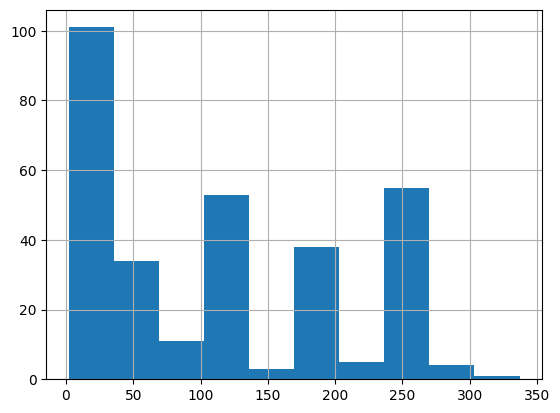

In [44]:
crowd_df["WorkTimeInSeconds"].hist()

In [45]:
crowd_df["LifetimeApprovalRate"]

0      99%
1      40%
2      98%
3      70%
4      70%
      ... 
300    98%
301    80%
302    85%
303    69%
304    40%
Name: LifetimeApprovalRate, Length: 305, dtype: object

In [70]:
#Remove data with below 5 seconds worktime 
#Remove data with below 60% approval rate

def percentage_to_float(s):
    return float(s[:-1])/100

new_approvals = crowd_df["LifetimeApprovalRate"]
new_approvals = new_approvals.apply(percentage_to_float)


filtered_crowd_df = crowd_df[crowd_df["WorkTimeInSeconds"] > 5]
filtered_crowd_df["LifetimeApprovalRate"] = new_approvals
filtered_crowd_df = filtered_crowd_df[filtered_crowd_df["LifetimeApprovalRate"] > 0.6]

def print_full(x):
    pd.set_option('display.max_rows', len(x))
    display(x)
    pd.reset_option('display.max_rows')
    
print_full(filtered_crowd_df)

C:\Users\Varun\AppData\Local\Temp\ipykernel_7628\1837587512.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,HITId,HITTypeId,Title,Reward,AssignmentId,WorkerId,AssignmentStatus,WorkTimeInSeconds,LifetimeApprovalRate,Input1ID,Input2ID,Input3ID,AnswerID,AnswerLabel,FixPosition,FixValue
0,1,7QT,Is this triple correct or incorrect?,$0.50,1,2133ICYWE97,Submitted,60,0.99,wd:Q11621,wdt:P2142,792910554,1.0,CORRECT,NaN,NaN
2,1,7QT,Is this triple correct or incorrect?,$0.50,3,928UJANWZ12,Submitted,50,0.98,wd:Q11621,wdt:P2142,792910554,2.0,INCORRECT,NaN,NaN
3,1,7QT,Is this triple correct or incorrect?,$0.50,4,1726JMZQW,Submitted,80,0.70,wd:Q11621,wdt:P2142,792910554,1.0,CORRECT,NaN,NaN
6,2,7QT,Is this triple correct or incorrect?,$0.50,7,2133ICYWE97,Submitted,120,0.99,wd:Q603545,wdt:P2142,4300000,1.0,CORRECT,NaN,NaN
7,2,7QT,Is this triple correct or incorrect?,$0.50,8,928UJANWZ12,Submitted,60,0.98,wd:Q603545,wdt:P2142,4300000,1.0,CORRECT,NaN,NaN
8,2,7QT,Is this triple correct or incorrect?,$0.50,9,1726JMZQW,Submitted,90,0.70,wd:Q603545,wdt:P2142,4300000,1.0,CORRECT,NaN,NaN
10,3,7QT,Is this triple correct or incorrect?,$0.50,11,2133ICYWE97,Submitted,140,0.99,wd:Q16911843,wdt:P577,2014-01-18,2.0,INCORRECT,Object,2014-02-18
11,3,7QT,Is this triple correct or incorrect?,$0.50,12,928UJANWZ12,Submitted,80,0.98,wd:Q16911843,wdt:P577,2014-01-18,1.0,CORRECT,NaN,NaN
14,3,7QT,Is this triple correct or incorrect?,$0.50,15,1726JMZQW,Submitted,300,0.70,wd:Q16911843,wdt:P577,2014-01-18,1.0,CORRECT,NaN,NaN
15,4,7QT,Is this triple correct or incorrect?,$0.50,16,2133ICYWE97,Submitted,120,0.99,wd:Q132863,wdt:P2142,969023261,2.0,INCORRECT,Object,NaN


<Axes: >

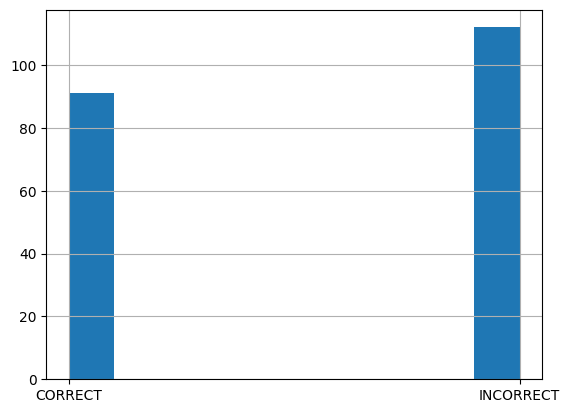

In [193]:
filtered_crowd_df["AnswerLabel"].hist()

In [201]:
import math 
import numpy as np


def most_common(lst):
    #print(lst)
    lst = [l for l in lst if (type(l)==float and not math.isnan(l)) or (type(l)!=float)]
    #print(lst)
    lst = [l for l in lst if (l!="I don't understand")]
    #print(lst)
    #print("---")
    if(len(lst)==0):
        return None
    return max(set(lst), key=lst.count)



cur_id = -1
no_correct = 0
no_incorrect = 0
fix_pos = []
fix_val = []
new_df = []
final_fix_pos = None
final_fix_val = None
for index, row in filtered_crowd_df.iterrows():
    print(index)
    print(row["FixValue"],fix_val)
            
    if(row['AnswerID']==1.0):
            no_correct+=1
    else:
        no_incorrect+=1
        fix_pos.append(row["FixPosition"])
        fix_val.append(row["FixValue"])
        
    if(cur_id!=row['HITId']):
        print("In")
        if(cur_id!=-1):
            print("2nd")
            if(len(fix_pos)>0):
                final_fix_pos = most_common(fix_pos)
            if(len(fix_val)>0):
                final_fix_val = most_common(fix_val)
            
            print("FFV:",final_fix_val)
            i1 = row["Input1ID"]
            i2 = row["Input2ID"]
            i3 = row["Input3ID"]
            #if(no_correct<no_incorrect):
            #    if(final_fix_pos == "Object" and final_fix_val!=None):
            #        i3 = final_fix_val
            #    elif(final_fix_pos == "Predicate" and final_fix_val!=None):
            #        i2 = final_fix_val
                
            new_df.append((cur_id,no_correct>=no_incorrect,no_correct,no_incorrect,i1,i2,i3,
                          final_fix_pos,final_fix_val))
            print("ID:",cur_id)
        no_correct=no_incorrect=0
        fix_pos = []
        fix_val = []
        cur_id = row['HITId']  
        

        
if(len(fix_pos)>0):
    final_fix_pos = most_common(fix_pos)
if(len(fix_val)>0):
    final_fix_val = most_common(fix_val)
new_df.append((cur_id,no_correct>=no_incorrect,no_correct,no_incorrect,row["Input1ID"],row["Input2ID"],row["Input3ID"],
              final_fix_pos,final_fix_val))

        
final_crowd_df = pd.DataFrame(new_df,columns=["HITId","Answer_bool","No_correct","No_incorrect","Input1ID","Input2ID","Input3ID",
                                             "Fix_position","Fix_value"])

final_crowd_df

0
nan []
In
2
nan []
3
nan [nan]
6
nan [nan]
In
2nd
FFV: None
ID: 1
7
nan []
8
nan []
10
2014-02-18 []
In
2nd
FFV: 2014-02-18
ID: 2
11
nan []
14
nan []
15
nan []
In
2nd
FFV: None
ID: 3
16
nan []
18
nan [nan]
20
nan [nan, nan]
In
2nd
FFV: None
ID: 4
22
nan []
23
nan []
25
nan []
In
2nd
FFV: None
ID: 5
26
nan []
28
2019-02-24 [nan]
30
nan [nan, '2019-02-24']
In
2nd
FFV: 2019-02-24
ID: 6
31
nan []
33
nan []
35
nan [nan]
In
2nd
FFV: None
ID: 7
36
698491348 []
37
nan ['698491348']
40
nan ['698491348', nan]
In
2nd
FFV: 698491348
ID: 8
41
nan []
42
nan [nan]
45
nan [nan, nan]
In
2nd
FFV: None
ID: 9
47
nan []
48
nan [nan]
50
nan [nan, nan]
In
2nd
FFV: None
ID: 10
51
wd:Q72 []
52
nan ['wd:Q72']
55
nan ['wd:Q72']
In
2nd
FFV: wd:Q72
ID: 11
56
nan []
58
nan []
60
wd:Q94074 []
In
2nd
FFV: wd:Q94074
ID: 12
61
nan []
63
nan []
65
nan []
In
2nd
FFV: None
ID: 13
66
nan []
68
nan [nan]
70
nan [nan, nan]
In
2nd
FFV: None
ID: 14
71
nan []
72
nan []
75
nan []
In
2nd
FFV: None
ID: 15
76
nan []
77
nan []
80


,HITId,Answer_bool,No_correct,No_incorrect,Input1ID,Input2ID,Input3ID,Fix_position,Fix_value
0,1,True,2,1,wd:Q603545,wdt:P2142,4300000,None,None
1,2,True,2,1,wd:Q16911843,wdt:P577,2014-01-18,Object,2014-02-18
2,3,True,2,1,wd:Q132863,wdt:P2142,969023261,Object,None
3,4,False,1,2,wd:Q1628022,wdt:P577,1951-01-01,Object,None
4,5,True,3,0,wd:Q48313910,wdt:P577,2018-02-24,Object,None
...,...,...,...,...,...,...,...,...,...
56,57,False,1,3,wd:Q943992,wdt:P161,wd:Q160432,Object,Q181900
57,58,True,2,2,wd:Q1893555,wdt:P272,wd:Q48784114,2,2
58,59,True,2,2,wd:Q21060270,wdt:P27,wd:Q916,Object,Q884
59,60,True,2,2,wd:Q1288004,wdt:P1412,wd:Q13330,Object,Q1860


In [205]:
#Calculating inter rater agreement
# First get data with worker IDs. Filter out only workers in the particular task. Then calculate the positive and negative, and irr


new_df = crowd_df[["HITId","WorkerId","AnswerID"]].copy()

#pint(new_df)

# THIS VARIABLE STATES WHICH TASK

def get_inter_rater_agreement(task_id):

    workers = []

    for index, row in new_df.iterrows():
        if(row["HITId"]==task_id):
            workers.append(row["WorkerId"])


    workers = list(set(workers))

    print(workers)

    no_correct = 0
    no_wrong = 0
    cur_id=-1

    arr = np.zeros((61,2))
    for index, row in new_df.iterrows():
        if(row["WorkerId"] in workers): 
            #print(row["HITId"])/
            
            if(row['AnswerID']==1.0):
                arr[row["HITId"]-1][0]+=1
            else:
                arr[row["HITId"]-1][1]+=1



    arr = arr[~np.all(arr == 0, axis=1)]

    #print(arr)


    #break
    #arr = new_df[["No_positive","No_negative"]].to_numpy()

    pi_sum = 0
    count = 0
    for row in arr:
        count+=1
        n = row[0]+row[1]
        pi = (row[0]*(row[0]-1) + row[1]*(row[1]-1))/(n*(n-1))
        pi_sum+= pi
        #print(count,pi_sum)

    P_bar = pi_sum/count
    print(P_bar)

    pj_total = np.sum(arr,axis=0)
    pj = np.divide(pj_total,np.sum(pj_total))

    Pe_bar = np.sum(np.square(pj))

    print(Pe_bar)

    K = (P_bar - Pe_bar)/(1 - Pe_bar)

    print("K = ", K)
    
    return K


IRA = []
for task_id in range(1,62):
    IRA.append(get_inter_rater_agreement(task_id))


final_crowd_df["Inter_rater_agreement"] = IRA

final_crowd_df



['2133ICYWE97', '2134U7HKDMM', '928UJANWZ12', '2133U7HKDLO', '1726JMZQW']
0.4666666666666667
0.52
K =  -0.11111111111111113
['2133ICYWE97', '2134U7HKDMM', '928UJANWZ12', '2133U7HKDLO', '1726JMZQW']
0.4666666666666667
0.52
K =  -0.11111111111111113
['2133ICYWE97', '2134U7HKDMM', '928UJANWZ12', '2133U7HKDLO', '1726JMZQW']
0.4666666666666667
0.52
K =  -0.11111111111111113
['2133ICYWE97', '2134U7HKDMM', '928UJANWZ12', '2133U7HKDLO', '1726JMZQW']
0.4666666666666667
0.52
K =  -0.11111111111111113
['2133ICYWE97', '2134U7HKDMM', '928UJANWZ12', '2133U7HKDLO', '1726JMZQW']
0.4666666666666667
0.52
K =  -0.11111111111111113
['2133ICYWE97', '2134U7HKDMM', '928UJANWZ12', '2133U7HKDLO', '1726JMZQW']
0.4666666666666667
0.52
K =  -0.11111111111111113
['2133ICYWE97', '2134U7HKDMM', '928UJANWZ12', '2133U7HKDLO', '1726JMZQW']
0.4666666666666667
0.52
K =  -0.11111111111111113
['2133ICYWE97', '2134U7HKDMM', '928UJANWZ12', '2133U7HKDLO', '1726JMZQW']
0.4666666666666667
0.52
K =  -0.11111111111111113
['2133IC

,HITId,Answer_bool,No_correct,No_incorrect,Input1ID,Input2ID,Input3ID,Fix_position,Fix_value,Inter_rater_agreement
0,1,True,2,1,wd:Q603545,wdt:P2142,4300000,None,None,-0.111111
1,2,True,2,1,wd:Q16911843,wdt:P577,2014-01-18,Object,2014-02-18,-0.111111
2,3,True,2,1,wd:Q132863,wdt:P2142,969023261,Object,None,-0.111111
3,4,False,1,2,wd:Q1628022,wdt:P577,1951-01-01,Object,None,-0.111111
4,5,True,3,0,wd:Q48313910,wdt:P577,2018-02-24,Object,None,-0.111111
...,...,...,...,...,...,...,...,...,...,...
56,57,False,1,3,wd:Q943992,wdt:P161,Jude Law,Object,Stan Lee,0.108354
57,58,True,2,2,wd:Q1893555,wdt:P272,WTFN,2,2,0.108354
58,59,True,2,2,wd:Q21060270,wdt:P27,Angola,Object,South Korea,0.108354
59,60,True,2,2,wd:Q1288004,wdt:P1412,Mirandese,Object,English,0.108354


In [206]:
ent2lbl = {ent: str(lbl) for ent, lbl in graph.subject_objects(RDFS.label)}

In [207]:
ent2lbl[rdflib.term.URIRef("http://www.wikidata.org/prop/direct/P577")]

'publication date'

In [226]:
new_input3 = []
new_fixval = []

extra_dict = {
    "http://www.wikidata.org/entity/Q16795448":"Fantastic Four",
    "http://www.wikidata.org/entity/Q94074":"Ludwig von Tetmajer",
    "http://www.wikidata.org/entity/Q95073":"Ardesio",
    "http://www.wikidata.org/entity/Q1860":"English"
    
}
for pred,fixval in zip(crowd_df["Input3ID"],final_crowd_df["Fix_value"]):
    newfixval=None
    newpred=None
    newpred = pred.replace("wd:","http://www.wikidata.org/entity/")
    #newpred = newpred.replace("wdt:","http://www.wikidata.org/prop/direct/")
    if((newpred[0]=="Q" or newpred[0]=="P") and newpred[1].isnumeric()):

        newpred = newpred.replace("Q","http://www.wikidata.org/entity/Q")
        #newfixval = newfixval.replace("P","http://www.wikidata.org/prop/direct/P")
        #new_input3.append(newpred)
    if(newpred!=pred):
        #print(pred,newpred)
        new_input3.append(ent2lbl[rdflib.term.URIRef(newpred)])
    else:
        res = extra_dict.get(newpred)
        #print("dict_get ",res)
        if(res!=None):
            new_input3.append(res)
        else:
            new_input3.append(newpred)
   
    if(fixval!=None):
        newfixval = fixval.replace("wd:","http://www.wikidata.org/entity/")
        #newfixval = newfixval.replace("wdt:","http://www.wikidata.org/prop/direct/")
    

            
        print("NEWFIXVAL",newfixval)
        if(newfixval!=fixval):
            print(newfixval)
            res = extra_dict.get(newfixval)
            #print("dict_get ",res)
            if(res!=None):
                new_fixval.append(res)
            else:
                try:
                    new_fixval.append(ent2lbl[rdflib.term.URIRef(newfixval)])
                except:
                    new_fixval.append(newfixval)
                
        else:
            res = extra_dict.get(newfixval)
            #print("dict_get ",res)
            if(res!=None):
                new_fixval.append(res)
            else:
                new_fixval.append(newfixval)
    else:
        res = extra_dict.get(newfixval)
        #print("dict_get ",res)
        if(res!=None):
            new_fixval.append(res)
        else:
            new_fixval.append(newfixval)

    
new_input3, len(new_fixval)

NEWFIXVAL 2014-02-18
NEWFIXVAL 2019-02-24
NEWFIXVAL 698491348
NEWFIXVAL Zürich
NEWFIXVAL Ludwig von Tetmajer
NEWFIXVAL Ardesio
NEWFIXVAL 2010-01-01
NEWFIXVAL 2011-01-01
NEWFIXVAL 2011-01-01
NEWFIXVAL 176997168
NEWFIXVAL 1992-01-01
NEWFIXVAL 2011-01-01
NEWFIXVAL 863756051
NEWFIXVAL Ezgi Mola
NEWFIXVAL Ezgi Mola
NEWFIXVAL Ezgi Mola
NEWFIXVAL 10696210
NEWFIXVAL The Blue Butterfly
NEWFIXVAL Horrible Bosses
NEWFIXVAL Horrible Bosses
NEWFIXVAL King Solomon's Mines
NEWFIXVAL Czech Dream
NEWFIXVAL Intimacy (novel)
NEWFIXVAL Airport
NEWFIXVAL Airport
NEWFIXVAL P106
NEWFIXVAL P344
NEWFIXVAL P344
NEWFIXVAL P58
NEWFIXVAL Erika Sainte
NEWFIXVAL Keith Walker
NEWFIXVAL free from 12 years
NEWFIXVAL P58
NEWFIXVAL Fantastic Four


(['792910554',
  '4300000',
  '2014-01-18',
  '1951-01-01',
  '267000000',
  'geographic entity',
  'organization',
  'fictional character',
  'written work',
  'series of creative works',
  'organization',
  '2010-01-01',
  '2011-01-01',
  '176997168',
  '1982-01-01',
  '2011-01-01',
  '863756050',
  '511200000',
  'Ezgi Mola',
  '2015-01-05',
  '10696220',
  'William Hurt',
  '2015-06-27',
  'Peter Breitmayer',
  'United States of America',
  'Netflix',
  'novel',
  'Frederick Worlock',
  'Rasmus Heise',
  'actor',
  'Rose McGowan',
  'Claude Lelouch',
  'John Lee Mahin',
  'Erika Sainte',
  'Ángel de Andrés Miquel',
  'free from 12 years',
  'Ashley Miller',
  'English',
  'PG',
  'FandangoNow',
  'Giuseppe Rinaldi',
  'Tomomichi Nishimura',
  'Japan',
  'Gdańsk',
  'Malaysia',
  'Edmonton',
  'Sheryl Lee Ralph',
  'WTFN',
  'Angola',
  'Mirandese'],
 50)

In [217]:
final_crowd_df["Input3ID"] = new_input3
final_crowd_df["Fix_value"] = new_fixval

print_full(final_crowd_df)

,HITId,Answer_bool,No_correct,No_incorrect,Input1ID,Input2ID,Input3ID,Fix_position,Fix_value,Inter_rater_agreement
0,1,True,2,1,wd:Q603545,wdt:P2142,4300000,None,None,-0.111111
1,2,True,2,1,wd:Q16911843,wdt:P577,2014-01-18,Object,2014-02-18,-0.111111
2,3,True,2,1,wd:Q132863,wdt:P2142,969023261,Object,None,-0.111111
3,4,False,1,2,wd:Q1628022,wdt:P577,1951-01-01,Object,None,-0.111111
4,5,True,3,0,wd:Q48313910,wdt:P577,2018-02-24,Object,None,-0.111111
5,6,False,1,2,wd:Q171300,wdt:P2142,267000000,Object,2019-02-24,-0.111111
6,7,False,1,2,wd:Q217010,wdt:P2142,698491347,Object,None,-0.111111
7,8,False,0,3,wd:Q4993462,wdt:P577,2008-08-29,Object,698491348,-0.111111
8,9,False,1,2,wd:Q7033842,wdt:P577,1996-06-01,None,None,-0.111111
9,10,False,1,2,wd:Q1339195,ddis:indirectSubclassOf,geographic entity,None,None,-0.111111


In [210]:
final_crowd_df.to_pickle("crowd_data_preprocessed.pkl")

In [231]:
crowd_data_file = "crowdsourcing_final.csv"

crowd_df = pd.read_csv(crowd_data_file)

crowd_df

Answer_bool = []

for i,row in crowd_df.iterrows():
    Answer_bool.append(row["AnswerLabel"]=="CORRECT")

crowd_df["Answer_bool"] = Answer_bool

crowd_df = crowd_df.drop(columns=["AnswerLabel","HITTypeId"])
crowd_df.rename(columns={'CORRECT':'No_correct',"INCORRECT":"No_incorrect","CORRECTED":"No_corrections",
                         "FleissKappa":"Inter_rater_agreement"}, inplace=True)

crowd_df

,HITId,No_correct,No_corrections,No_incorrect,Input1ID,Input2ID,Input3ID,Inter_rater_agreement,Answer_bool
0,1,2,0,1,wd:Q11621,wdt:P2142,792910554,0.236364,True
1,2,3,0,0,wd:Q603545,wdt:P2142,4300000,0.236364,True
2,3,2,0,1,wd:Q16911843,wdt:P577,2014-01-18,0.236364,True
3,5,3,0,0,wd:Q1628022,wdt:P577,1951-01-01,0.236364,True
4,7,2,0,1,wd:Q171300,wdt:P2142,267000000,0.236364,True
5,11,2,0,1,wd:Q1339195,ddis:indirectSubclassOf,wd:Q27096213,0.236364,True
6,12,3,0,0,wd:Q104649845,ddis:indirectSubclassOf,wd:Q43229,0.236364,True
7,13,2,0,1,wd:Q61928601,ddis:indirectSubclassOf,wd:Q95074,0.236364,True
8,15,3,0,0,wd:Q8275050,ddis:indirectSubclassOf,wd:Q47461344,0.236364,True
9,16,2,0,1,wd:Q17710986,ddis:indirectSubclassOf,wd:Q7725310,0.236364,True


In [232]:
crowd_df["Input3ID"] = new_input3

crowd_df

,HITId,No_correct,No_corrections,No_incorrect,Input1ID,Input2ID,Input3ID,Inter_rater_agreement,Answer_bool
0,1,2,0,1,wd:Q11621,wdt:P2142,792910554,0.236364,True
1,2,3,0,0,wd:Q603545,wdt:P2142,4300000,0.236364,True
2,3,2,0,1,wd:Q16911843,wdt:P577,2014-01-18,0.236364,True
3,5,3,0,0,wd:Q1628022,wdt:P577,1951-01-01,0.236364,True
4,7,2,0,1,wd:Q171300,wdt:P2142,267000000,0.236364,True
5,11,2,0,1,wd:Q1339195,ddis:indirectSubclassOf,geographic entity,0.236364,True
6,12,3,0,0,wd:Q104649845,ddis:indirectSubclassOf,organization,0.236364,True
7,13,2,0,1,wd:Q61928601,ddis:indirectSubclassOf,fictional character,0.236364,True
8,15,3,0,0,wd:Q8275050,ddis:indirectSubclassOf,written work,0.236364,True
9,16,2,0,1,wd:Q17710986,ddis:indirectSubclassOf,series of creative works,0.236364,True


In [230]:
crowd_df.to_pickle("./data/crowd_data_preprocessed.pkl")

In [ ]:
some_df = pd.read_pickle("")